In [1]:
import pandas as pd
import numpy as np
import scipy as sts
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#arrest19 = "Data/IL2019/NIBRS_ARRESTEE.csv"
arrest_df19 = pd.read_csv("Data/IL2019/NIBRS_ARRESTEE.csv")
#incident19 = "Data/IL2019/NIBRS_incident.csv"
incident_df19 = pd.read_csv("Data/IL2019/NIBRS_incident.csv")
merged2019 = pd.merge(incident_df19, arrest_df19, on="INCIDENT_ID")
#offence_type19 = "Data/IL2019/NIBRS_OFFENSE_TYPE.csv"
offense_df19 = pd.read_csv("Data/IL2019/NIBRS_OFFENSE_TYPE.csv")
merged2019 = pd.merge(merged2019, offense_df19, on="OFFENSE_TYPE_ID")

In [17]:
#arrest09 = "Data/IL2009/nibrs_arrestee.csv"
arrest_df09 = pd.read_csv("Data/IL2009/nibrs_arrestee.csv")
#incident09 = "Data/IL2009/nibrs_incident.csv"
incident_df09 = pd.read_csv("Data/IL2009/nibrs_incident.csv")
merged2009 = pd.merge(incident_df09, arrest_df09, on="incident_id")
#offence_type09 = "Data/IL2009/NIBRS_OFFENSE_TYPE.csv"

In [18]:
offense_df09 = pd.read_csv("Data/IL2009/NIBRS_OFFENSE_TYPE.csv")
merged2009 = pd.merge(merged2009, offense_df09, on="OFFENSE_TYPE_ID")
winter_months = [11,12,1,2]

KeyError: 'OFFENSE_TYPE_ID'

In [16]:
merged2009.offense_type_id.value_counts()

51    1765
23     931
16     754
5      323
49     306
27     255
45     198
35     153
40     136
11      92
44      54
14      53
39      43
28      43
30      36
29      24
36      22
32      20
41      18
56      16
2       15
15      10
20       9
46       5
8        2
37       1
38       1
7        1
Name: offense_type_id, dtype: int64

'Data/IL2019/NIBRS_ARRESTEE.csv'

In [43]:
merged2019['MONTH'] = pd.DatetimeIndex(merged2019['INCIDENT_DATE']).month
merged2009['MONTH'] = pd.DatetimeIndex(merged2019['INCIDENT_DATE']).month
merged2019

,DATA_YEAR_x,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,...,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,CT_FLAG,HC_FLAG,HC_CODE,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,VIOLENT_CRIME,MONTH
0,2019,5659,121201578,8219647,NaN,26-FEB-20,08-NOV-19,NaN,7,6,...,100,Kidnapping/Abduction,Person,N,Y,NaN,Kidnapping/Abduction,A,Y,11
1,2019,5659,121201519,8204323,NaN,26-FEB-20,07-SEP-19,NaN,10,6,...,100,Kidnapping/Abduction,Person,N,Y,NaN,Kidnapping/Abduction,A,Y,9
2,2019,5659,122511116,8143027,NaN,23-MAR-20,29-JAN-19,NaN,19,6,...,100,Kidnapping/Abduction,Person,N,Y,NaN,Kidnapping/Abduction,A,Y,1
3,2019,5659,111314561,8150689,NaN,22-MAY-19,16-FEB-19,NaN,2,6,...,100,Kidnapping/Abduction,Person,N,Y,NaN,Kidnapping/Abduction,A,Y,2
4,2019,5659,111314586,8150689,NaN,22-MAY-19,24-FEB-19,NaN,11,6,...,100,Kidnapping/Abduction,Person,N,Y,NaN,Kidnapping/Abduction,A,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2019,5659,121196510,8150689,NaN,26-FEB-20,21-FEB-19,NaN,11,6,...,40A,Prostitution,Society,N,Y,NaN,Prostitution Offenses,A,Y,2
4136,2019,5659,121196510,8150689,NaN,26-FEB-20,21-FEB-19,NaN,11,6,...,40A,Prostitution,Society,N,Y,NaN,Prostitution Offenses,A,Y,2
4137,2019,5659,121196510,8150689,NaN,26-FEB-20,21-FEB-19,NaN,11,6,...,40A,Prostitution,Society,N,Y,NaN,Prostitution Offenses,A,Y,2
4138,2019,5659,121196510,8150689,NaN,26-FEB-20,21-FEB-19,NaN,11,6,...,40A,Prostitution,Society,N,Y,NaN,Prostitution Offenses,A,Y,2


In [18]:
violent = merged2019.loc[merged2019['VIOLENT_CRIME'] == 'Y']
v_count = violent.groupby(['MONTH'])['INCIDENT_ID'].count()
non_violent = merged2019.loc[merged2019['VIOLENT_CRIME'] == 'N']
n_count = non_violent.groupby(['MONTH'])['INCIDENT_ID'].count()

In [37]:
v_n_combined = pd.merge(v_count, n_count, left_index=True, right_index=True)
x = ['Jan', 'Feb' , 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]

In [38]:
v_n_combined.rename(columns={'INCIDENT_ID_x': 'VIOLENT' , 'INCIDENT_ID_y' : 'NON_VIOLENT' }, inplace=True)

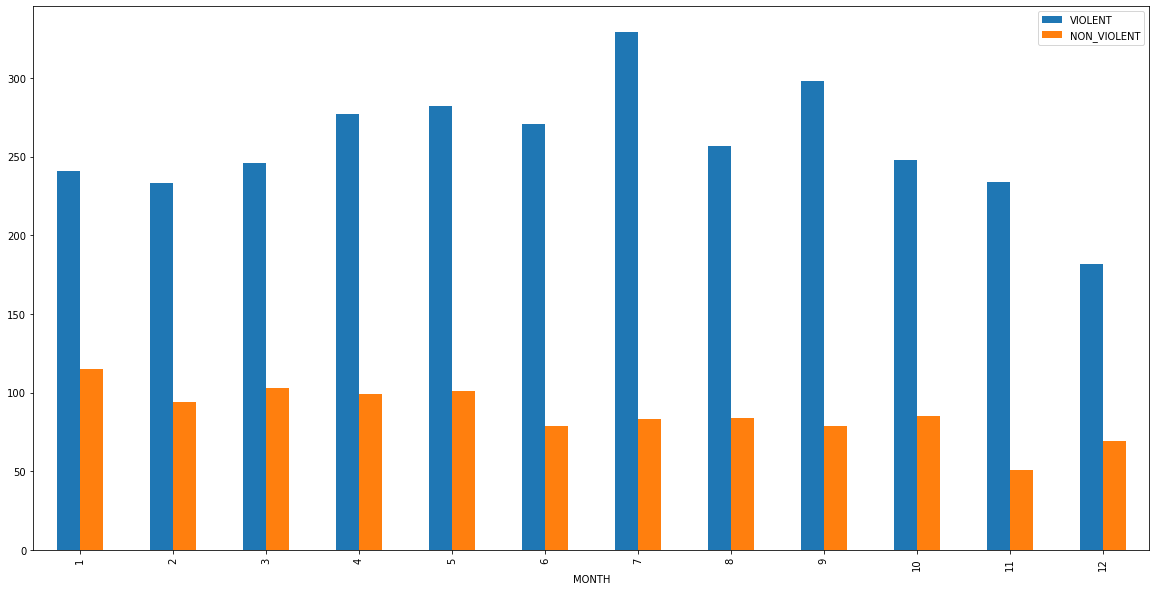

In [42]:
v_n_combined.plot.bar(figsize=(20, 10), rot=90)
plt.

,DATA_YEAR_x,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,...,AGE_RANGE_HIGH_NUM,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,CT_FLAG,HC_FLAG,HC_CODE,OFFENSE_CATEGORY_NAME,OFFENSE_GROUP,VIOLENT_CRIME
MONTH,,,,,,,,,,,,,,,,,,,,,
1,356,356,356,356,0,356,356,0,356,356,...,356,356,356,356,356,356,168,356,356,356
2,327,327,327,327,0,327,327,0,327,327,...,327,327,327,327,327,327,151,327,327,327
3,349,349,349,349,0,349,349,0,349,349,...,349,349,349,349,349,349,168,349,349,349
4,376,376,376,376,0,376,376,0,376,376,...,376,376,376,376,376,376,201,376,376,376
5,383,383,383,383,0,383,383,0,383,383,...,383,383,383,383,383,383,210,383,383,383


In [20]:
y= y['MONTH'].count()
w= winter.groupby('MONTH')
w = w['MONTH'].count()
w = pd
w

<module 'pandas' from 'C:\\Users\\georg\\.conda\\envs\\PythonData\\lib\\site-packages\\pandas\\__init__.py'>

In [16]:
x_axis = np.arange(1, 11, 1)
#x_axis
winter.describe()
#winter = winter['month']

,DATA_YEAR_x,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,INCIDENT_STATUS,DID,...,OFFENSE_TYPE_ID,AGE_ID,AGE_NUM,RACE_ID,ETHNICITY_ID,CLEARANCE_IND,AGE_RANGE_LOW_NUM,AGE_RANGE_HIGH_NUM,HC_CODE,MONTH
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TypeError: float() argument must be a string or a number, not 'module'

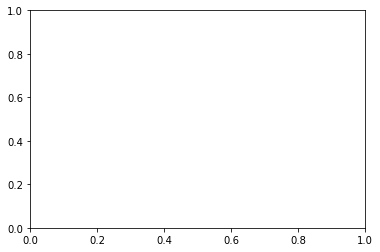

In [17]:
plt.plot(w)
plt.plot(y)

In [ ]:
merg

In [ ]:
diffrev = budget_df["Profit/Losses"].diff()
diffrev_df = pd.DataFrame(diffrev)

maxrev = diffrev.max()
maxrevrow = diffrev_df.loc[diffrev_df["Profit/Losses"]==maxrev]
maxrevindex = maxrevrow.index
greatest_increase = budget_df.loc[maxrevindex]
greatest_increase_date = greatest_increase["Date"]

minrev = diffrev.min()
minrevrow = diffrev_df.loc[diffrev_df["Profit/Losses"]==minrev]
minrevindex = minrevrow.index
greatest_decrease = budget_df.loc[minrevindex]
greatest_decrease_date = greatest_decrease["Date"]

avgrevchange = diffrev.mean()

In [ ]:
print("----------------------------------------------------------")
print("Financial Analysis")
print("----------------------------------------------------------")
print("Total Months: " + str(totalmonths))
print("Total Profits: " + "$" + str(netprofit))
print("Average Change: " + "$" + str(avgrevchange))
print("Greatest Increase in Profits: " + str(greatest_increase_date) + " ($" + str(maxrev) + ")")
print("Greatest Decrease in Profits: " + str(greatest_decrease_date) + " ($" + str(minrev)+ ")")
print("----------------------------------------------------------")

In [ ]:
with open('financial_analysis.txt', 'w') as text:
    text.write("----------------------------------------------------------\n")
    text.write("  Financial Analysis"+ "\n")
    text.write("----------------------------------------------------------\n\n")
    text.write("Total Months: " + str(totalmonths)+ "\n")
    text.write("Total Profits: " + "$" + str(netprofit)+ "\n")
    text.write("Average Change:" + "$" + str(avgrevchange)+ "\n")
    text.write("Greatest Increase in Profits: " + str(greatest_increase_date) + " ($" + str(maxrev) + ")" + ")\n")
    text.write("Greatest Decrease in Profits: " + str(greatest_decrease_date) + " ($" + str(minrev)+ ")" + ")\n")
    text.write("----------------------------------------------------------\n")